In [1]:
# Importing essential libraries
import numpy as np
import pandas as pd

In [2]:
# Loading the dataset
df = pd.read_csv("C:\\Users\\ASUS\\Downloads\\archive\\spam_sms.csv", sep=',', names=['label', 'message'])

In [3]:
df.shape

(5572, 2)

In [4]:
df.columns

Index(['label', 'message'], dtype='object')

In [5]:
df.dtypes

label      object
message    object
dtype: object

In [6]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.tail()

,label,message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
df.describe(include='object')

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
# Mapping values for label
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [11]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.tail()

,label,message
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...
5571,0,Rofl. Its true to its name


In [13]:
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

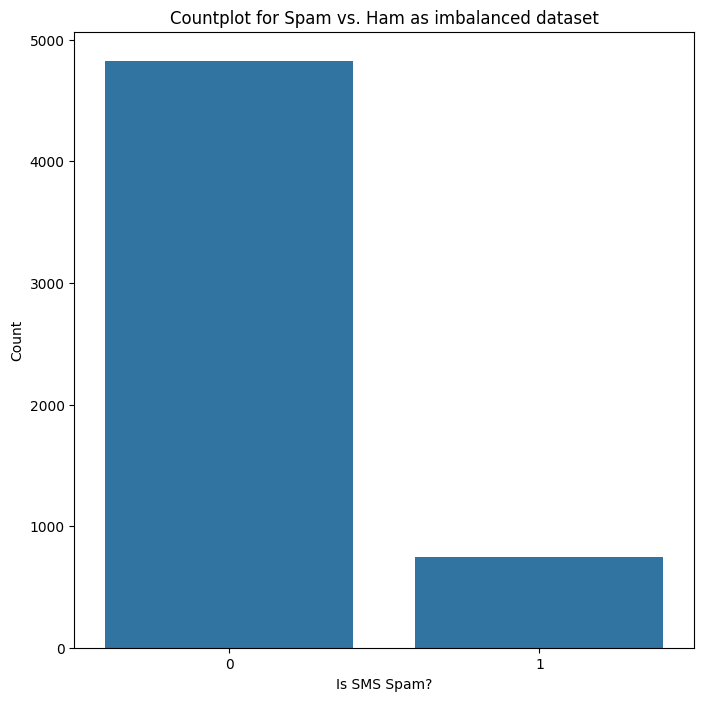

In [14]:
# Countplot for Spam vs. Ham as imbalanced dataset
plt.figure(figsize=(8,8))
g = sns.countplot(x='label', data=df)
p = plt.title('Countplot for Spam vs. Ham as imbalanced dataset')
p = plt.xlabel('Is SMS Spam?')
p = plt.ylabel('Count')

In [15]:
# Handling imbalanced dataset using Oversampling
only_spam = df[df['label']==1]
print('Number of Spam records: {}'.format(only_spam.shape[0]))
print('Number of Ham records: {}'.format(df.shape[0]-only_spam.shape[0]))

Number of Spam records: 747
Number of Ham records: 4825


In [16]:
count = int((df.shape[0]-only_spam.shape[0])/only_spam.shape[0])
for i in range(0, count-1):
  df = pd.concat([df, only_spam])

df.shape

(9307, 2)

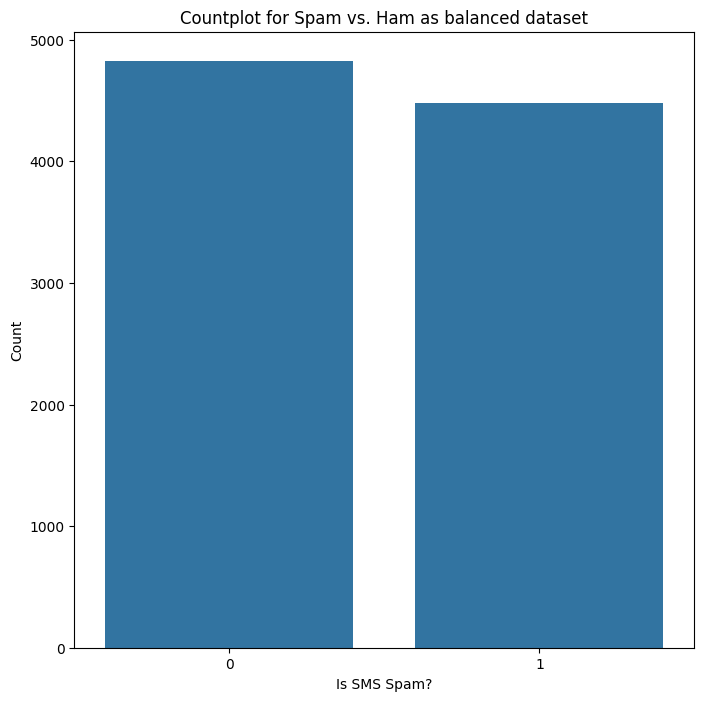

In [17]:
# Countplot for Spam vs. Ham as balanced dataset
plt.figure(figsize=(8,8))
g = sns.countplot(x='label', data=df)
p = plt.title('Countplot for Spam vs. Ham as balanced dataset')
p = plt.xlabel('Is SMS Spam?')
p = plt.ylabel('Count')

In [18]:
# Creating new feature word_count
df['word_count'] = df['message'].apply(lambda x: len(x.split()))

In [19]:
df.head()

,label,message,word_count
0,0,"Go until jurong point, crazy.. Available only ...",20
1,0,Ok lar... Joking wif u oni...,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,0,U dun say so early hor... U c already then say...,11
4,0,"Nah I don't think he goes to usf, he lives aro...",13


C:\Users\ASUS\AppData\Local\Temp\ipykernel_1376\1446840367.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(a=df[df['label']==0].word_count)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_1376\1446840367.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(a=df[df['label']==1].word_count,

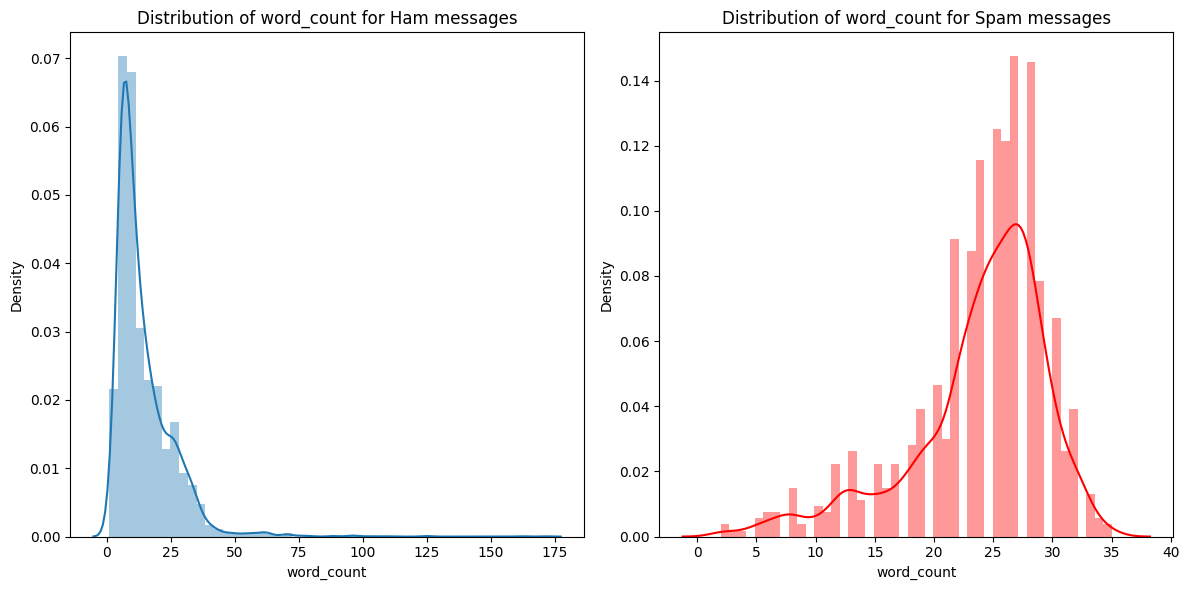

In [20]:
plt.figure(figsize=(12, 6))

# 1-row, 2-column, go to the first subplot
plt.subplot(1, 2, 1)
g = sns.distplot(a=df[df['label']==0].word_count)
p = plt.title('Distribution of word_count for Ham messages')

# 1-row, 2-column, go to the second subplot
plt.subplot(1, 2, 2)
g = sns.distplot(a=df[df['label']==1].word_count, color='red')
p = plt.title('Distribution of word_count for Spam messages')

plt.tight_layout()
plt.show()

In [21]:
# Creating feature contains_currency_symbol
def currency(x):
  currency_symbols = ['€', '$', '¥', '£', '₹']
  for i in currency_symbols:
    if i in x:
      return 1
  return 0

df['contains_currency_symbol'] = df['message'].apply(currency)

In [22]:
df.tail()

,label,message,word_count,contains_currency_symbol
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0
5567,1,This is the 2nd time we have tried 2 contact u...,30,1


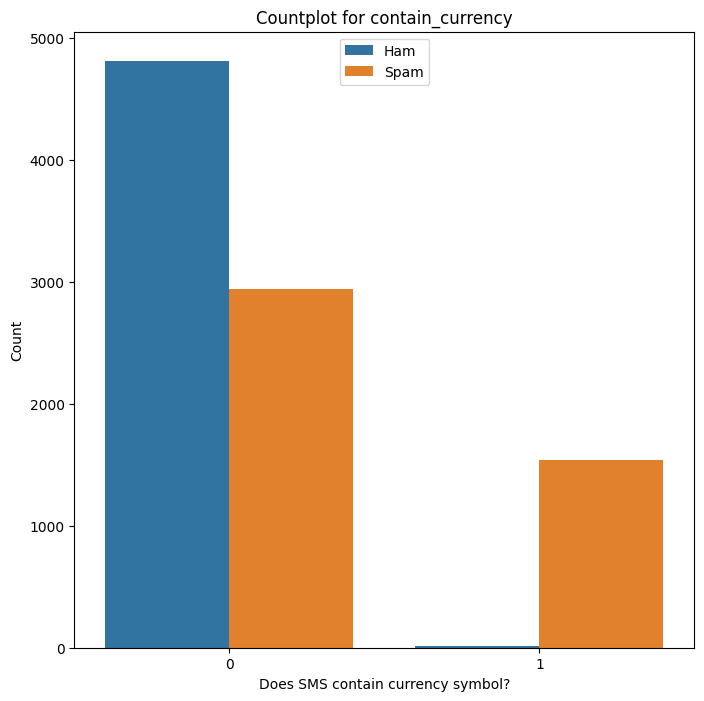

In [23]:
# Countplot for contains_currency_symbol
plt.figure(figsize=(8,8))
g = sns.countplot(x='contains_currency_symbol', data=df, hue='label')
p = plt.title('Countplot for contain_currency')
p = plt.xlabel('Does SMS contain currency symbol?')
p = plt.ylabel('Count')
p = plt.legend(labels=['Ham', 'Spam'], loc=9)

In [24]:
# Creating feature contains_number
def numbers(x):
  for i in x:
    if ord(i)>=48 and ord(i)<=57:
      return 1
  return 0

df['contains_number'] = df['message'].apply(numbers)

In [25]:
df.head()

,label,message,word_count,contains_currency_symbol,contains_number
0,0,"Go until jurong point, crazy.. Available only ...",20,0,0
1,0,Ok lar... Joking wif u oni...,6,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0,1
3,0,U dun say so early hor... U c already then say...,11,0,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0,0


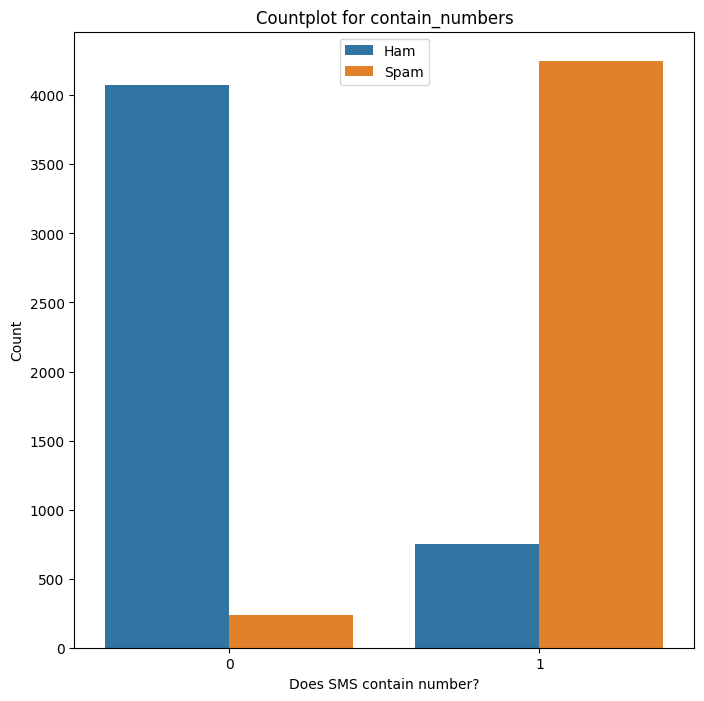

In [26]:
# Countplot for contains_number
plt.figure(figsize=(8,8))
g = sns.countplot(x='contains_number', data=df, hue='label')
p = plt.title('Countplot for contain_numbers')
p = plt.xlabel('Does SMS contain number?')
p = plt.ylabel('Count')
p = plt.legend(labels=['Ham', 'Spam'], loc=9)

In [27]:
# Importing essential libraries for performing NLP
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [28]:
# Cleaning the messages
corpus = []
wnl = WordNetLemmatizer()

for sms_string in list(df.message):

  # Cleaning special character from the sms
  message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sms_string)

  # Converting the entire sms into lower case
  message = message.lower()

  # Tokenizing the sms by words
  words = message.split()

  # Removing the stop words
  filtered_words = [word for word in words if word not in set(stopwords.words('english'))]

  # Lemmatizing the words
  lemmatized_words = [wnl.lemmatize(word) for word in filtered_words]

  # Joining the lemmatized words
  message = ' '.join(lemmatized_words)

  # Building a corpus of messages
  corpus.append(message)

In [29]:
corpus[0:3]

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply']

In [30]:
# After preprocessing
df['cleaned_message'] = corpus

# Now display the cleaned messages
print(df[['cleaned_message', 'label']].head())


                                     cleaned_message  label
0  go jurong point crazy available bugis n great ...      0
1                            ok lar joking wif u oni      0
2  free entry wkly comp win fa cup final tkts st ...      1
3                u dun say early hor u c already say      0
4                nah think go usf life around though      0


In [30]:
import sklearn
print(sklearn.__version__)


1.6.1


In [31]:
!pip install --upgrade scikit-learn


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Creating the Bag of Words model
tfidf = TfidfVectorizer(max_features=500)
vectors = tfidf.fit_transform(corpus).toarray()
feature_names = tfidf.get_feature_names_out()  # Use get_feature_names_out() instead of get_feature_names()

# Extracting independent and dependent variables from the dataset
X = pd.DataFrame(vectors, columns=feature_names)
y = df['label']


In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
    # Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
cv = cross_val_score(mnb, X, y, scoring='f1', cv=10)
print('--- Average F1-Score for MNB model: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average F1-Score for MNB model: 0.944 ---
Standard Deviation: 0.004


In [36]:
# Classification report for MNB model
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)

print('--- Classification report for MNB model ---')
print(classification_report(y_test, y_pred))

--- Classification report for MNB model ---
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       958
           1       0.94      0.94      0.94       904

    accuracy                           0.94      1862
   macro avg       0.94      0.94      0.94      1862
weighted avg       0.94      0.94      0.94      1862



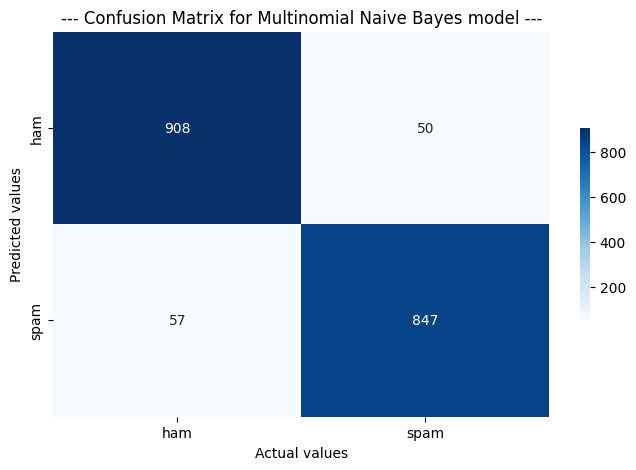

In [39]:
# Confusion matrix of MNB model
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g', cbar_kws={"shrink": 0.5})
p = plt.xlabel('Actual values')
p = plt.ylabel('Predicted values')
p = plt.title('--- Confusion Matrix for Multinomial Naive Bayes model ---')

In [40]:
# Fitting Random Forest to the Training set
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
cv = cross_val_score(dt, X, y, scoring='f1', cv=10)
print('--- Average F1-Score for Decision Tree model: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average F1-Score for Decision Tree model: 0.979 ---
Standard Deviation: 0.005


In [41]:
# Classification report for Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print('--- Classification report for Decision Tree model ---')
print(classification_report(y_test, y_pred))

--- Classification report for Decision Tree model ---
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       958
           1       0.97      1.00      0.98       904

    accuracy                           0.98      1862
   macro avg       0.98      0.98      0.98      1862
weighted avg       0.98      0.98      0.98      1862



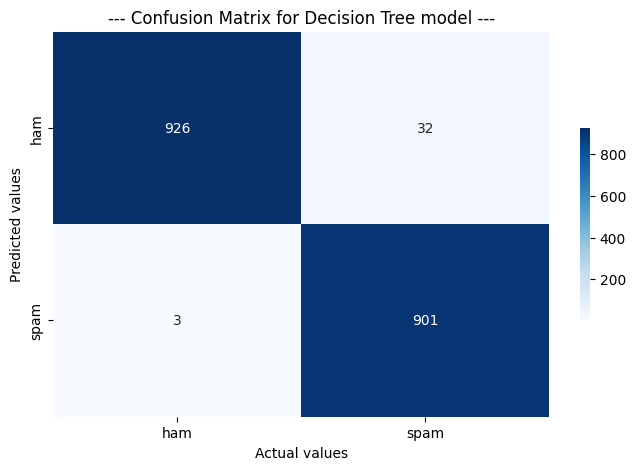

In [42]:
# Confusion matrix of Decision Tree model
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g', cbar_kws={"shrink": 0.5})
p = plt.xlabel('Actual values')
p = plt.ylabel('Predicted values')
p = plt.title('--- Confusion Matrix for Decision Tree model ---')

In [43]:
# Fitting Random Forest to the Training set
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10)
cv = cross_val_score(rf, X, y, scoring='f1', cv=10)
print('--- Average F1-Score for Random Forest model: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average F1-Score for Random Forest model: 0.995 ---
Standard Deviation: 0.002


In [44]:
# Classification report for Random Forest model
rf = RandomForestClassifier(n_estimators=20)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print('--- Classification report for Random Forest model ---')
print(classification_report(y_test, y_pred))

--- Classification report for Random Forest model ---
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       958
           1       0.99      1.00      0.99       904

    accuracy                           0.99      1862
   macro avg       0.99      0.99      0.99      1862
weighted avg       0.99      0.99      0.99      1862



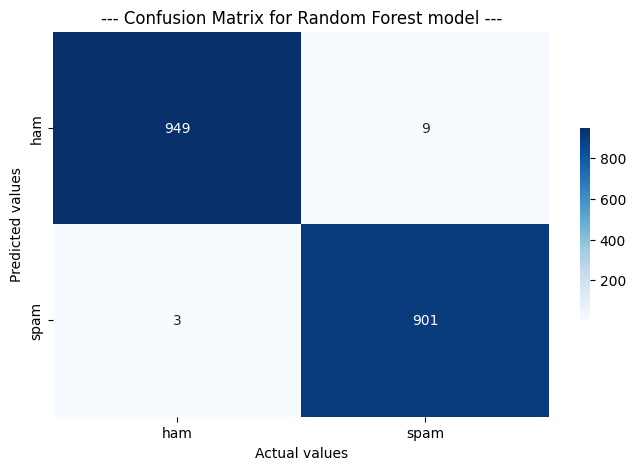

In [45]:
# Confusion matrix of Random Forest model
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g', cbar_kws={"shrink": 0.5})
p = plt.xlabel('Actual values')
p = plt.ylabel('Predicted values')
p = plt.title('--- Confusion Matrix for Random Forest model ---')

In [46]:
# Fitting Decision Tree and MNB to VotingClassifier
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier([('decision_tree', dt), ('m_naive_bayes', mnb)], weights=[2,1])
cv = cross_val_score(vc, X, y, cv=10, scoring='f1')

print('--- Average F1-Score for VotingClassifier model: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average F1-Score for VotingClassifier model: 0.979 ---
Standard Deviation: 0.005


In [47]:
def predict_spam(sample_message):
  sample_message = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_message)
  sample_message = sample_message.lower()
  sample_message_words = sample_message.split()
  sample_message_words = [word for word in sample_message_words if not word in set(stopwords.words('english'))]
  final_message = [wnl.lemmatize(word) for word in sample_message_words]
  final_message = ' '.join(final_message)

  temp = tfidf.transform([final_message]).toarray()
  return rf.predict(temp)

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

def plot_learning_curve(model, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, scoring='f1_macro', n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10))

    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(8, 5))
    plt.plot(train_sizes, train_mean, label="Training score")
    plt.plot(train_sizes, test_mean, label="Cross-validation score")
    plt.title(f'Learning Curve: {title}')
    plt.xlabel("Training Size")
    plt.ylabel("F1 Score")
    plt.legend()
    plt.grid(True)
    plt.show()




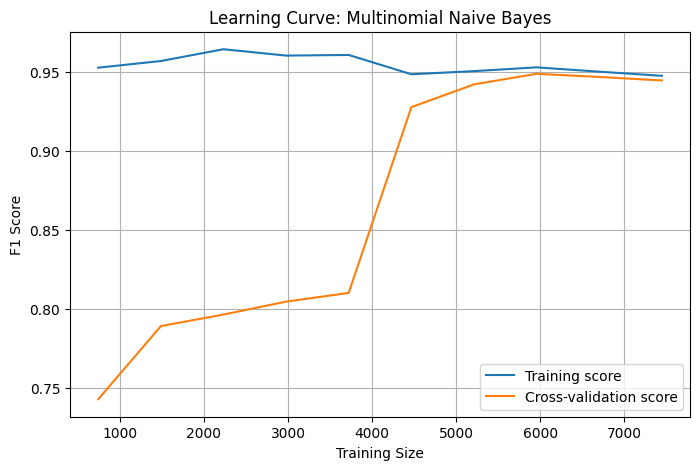

In [49]:
plot_learning_curve(MultinomialNB(), X, y, "Multinomial Naive Bayes")

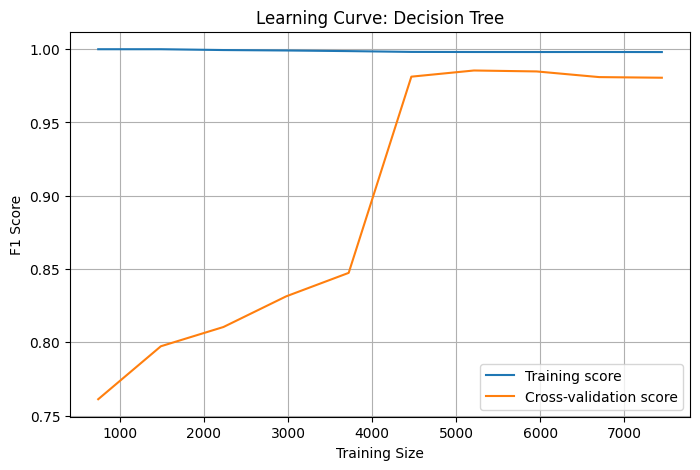

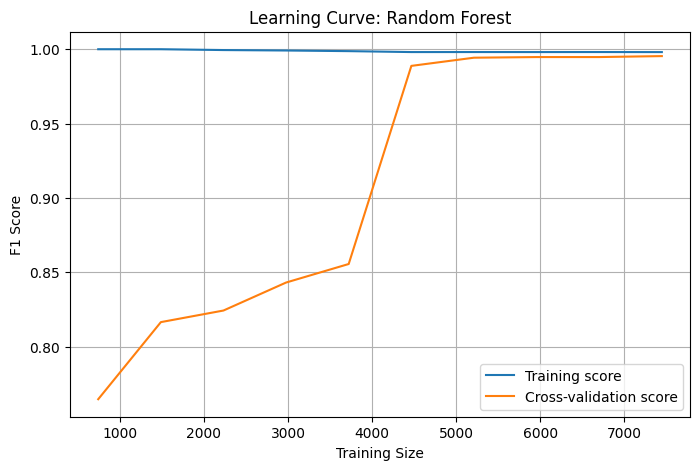

In [50]:
plot_learning_curve(DecisionTreeClassifier(), X, y, "Decision Tree")
plot_learning_curve(RandomForestClassifier(), X, y, "Random Forest")

In [51]:
# Prediction 1 - Lottery text message
sample_message = 'IMPORTANT - You could be entitled up to £3,160 in compensation from mis-sold PPI on a credit card or loan. Please reply PPI for info or STOP to opt out.'

if predict_spam(sample_message):
  print('Gotcha! This is a SPAM message.')
else:
  print('This is a HAM (normal) message.')

Gotcha! This is a SPAM message.


C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [47]:
# Prediction 2 - Casual text chat
sample_message = 'Came to think of it. I have never got a spam message before.'

if predict_spam(sample_message):
  print('Gotcha! This is a SPAM message.')
else:
  print('This is a HAM (normal) message.')

This is a HAM (normal) message.


C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [48]:
# Prediction 3 - Transaction confirmation text message
sample_message = 'Sam, your rent payment for Jan 19 has been received. $1,300 will be drafted from your Wells Fargo Account ******0000 within 24-48 business hours. Thank you!'

if predict_spam(sample_message):
  print('Gotcha! This is a SPAM message.')
else:
  print('This is a HAM (normal) message.')

This is a HAM (normal) message.


C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [49]:
# Predicting values 4 - Feedback message
sample_message = 'Tammy, thanks for choosing Carl’s Car Wash for your express polish. We would love to hear your thoughts on the service. Feel free to text back with any feedback. Safe driving!'

if predict_spam(sample_message):
  print('Gotcha! This is a SPAM message.')
else:
  print('This is a HAM (normal) message.')

Gotcha! This is a SPAM message.


C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [50]:
# Predicting values 5 - my own message
sample_message = 'abhinay is a very good person.'

if predict_spam(sample_message):
  print('Gotcha! This is a SPAM message.')
else:
  print('This is a HAM (normal) message.')

This is a HAM (normal) message.


C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [56]:
# Predicting values 6 - my own message
sample_message = "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

if predict_spam(sample_message):
  print('Gotcha! This is a SPAM message.')
else:
  print('This is a HAM (normal) message.')

Gotcha! This is a SPAM message.


C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [57]:
# Predicting values 6 - my own message
sample_message = "Secret investment opportunity! Double your money in 48 hours. Contact now!"

if predict_spam(sample_message):
  print('Gotcha! This is a SPAM message.')
else:
  print('This is a HAM (normal) message.')

This is a HAM (normal) message.


C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [60]:
def predict_spam(sample_message, threshold=0.5):
    # Clean the message like training corpus
    sample_message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sample_message)
    sample_message = sample_message.lower()
    sample_message_words = sample_message.split()
    sample_message_words = [word for word in sample_message_words if word not in set(stopwords.words('english'))]
    lemmatized_words = [wnl.lemmatize(word) for word in sample_message_words]
    final_message = ' '.join(lemmatized_words)

    # Transform using TF-IDF
    temp = tfidf.transform([final_message]).toarray()

    # Predict probability
    spam_prob = rf.predict_proba(temp)[0][1]  # Probability of class 'spam'

    # Debug: See spam probability
    print(f"Spam Probability: {spam_prob:.4f}")

    # Use threshold to decide
    return spam_prob >= threshold


In [61]:
sample_message = "Secret investment opportunity! Double your money in 48 hours. Contact now!"

if predict_spam(sample_message):
    print('Gotcha! This is a SPAM message.')
else:
    print('This is a HAM (normal) message.')


Spam Probability: 0.2114
This is a HAM (normal) message.


C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [65]:
sample_message = "Your number was randomly selected for a $500 Walmart Gift Card! Claim it now!"

if predict_spam(sample_message):
    print('Gotcha! This is a SPAM message.')
else:
    print('This is a HAM (normal) message.')


Spam Probability: 0.6545
Gotcha! This is a SPAM message.


C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [66]:
# Predicting values 6 - my own message
sample_message = "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

if predict_spam(sample_message):
  print('Gotcha! This is a SPAM message.')
else:
  print('This is a HAM (normal) message.')

Spam Probability: 1.0000
Gotcha! This is a SPAM message.


C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [67]:
# Predicting values 5 - my own message
sample_message = 'abhinay is a very good person.'

if predict_spam(sample_message):
  print('Gotcha! This is a SPAM message.')
else:
  print('This is a HAM (normal) message.')

Spam Probability: 0.0000
This is a HAM (normal) message.


C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [68]:
# Predicting values 4 - Feedback message
sample_message = 'Tammy, thanks for choosing Carl’s Car Wash for your express polish. We would love to hear your thoughts on the service. Feel free to text back with any feedback. Safe driving!'

if predict_spam(sample_message):
  print('Gotcha! This is a SPAM message.')
else:
  print('This is a HAM (normal) message.')

Spam Probability: 0.6500
Gotcha! This is a SPAM message.


C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [69]:
# Prediction 3 - Transaction confirmation text message
sample_message = 'Sam, your rent payment for Jan 19 has been received. $1,300 will be drafted from your Wells Fargo Account ******0000 within 24-48 business hours. Thank you!'

if predict_spam(sample_message):
  print('Gotcha! This is a SPAM message.')
else:
  print('This is a HAM (normal) message.')

Spam Probability: 0.0500
This is a HAM (normal) message.


C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [70]:
# Prediction 3 - Transaction confirmation text message
sample_message = "Make $10,000 per week from home with ZERO effort! Limited spots left!"

if predict_spam(sample_message):
  print('Gotcha! This is a SPAM message.')
else:
  print('This is a HAM (normal) message.')

Spam Probability: 0.1000
This is a HAM (normal) message.


C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [74]:
# Prediction 3 - Transaction confirmation text message
sample_message = "Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030"

if predict_spam(sample_message):
  print('Gotcha! This is a SPAM message.')
else:
  print('This is a HAM (normal) message.')

Spam Probability: 1.0000
Gotcha! This is a SPAM message.


C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [76]:
# Prediction 3 - Transaction confirmation text message
sample_message = "XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or click here>> http://wap. xxxmobilemovieclub.com?n=QJKGIGHJJGCBL"
if predict_spam(sample_message):
  print('Gotcha! This is a SPAM message.')
else:
  print('This is a HAM (normal) message.')

Spam Probability: 1.0000
Gotcha! This is a SPAM message.


C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [52]:
# ------------------------------
# Import Libraries
# ------------------------------
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# ------------------------------
# Preprocessing Setup
# ------------------------------
stop_words = set(stopwords.words('english'))
wnl = WordNetLemmatizer()

def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text).lower()
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(wnl.lemmatize(word) for word in words)

# ------------------------------
# Load Spam/Ham Dataset
# ------------------------------
spam_df = pd.read_csv("C:\\Users\\ASUS\\Downloads\\archive\\spam_sms.csv", names=["label", "message"], skiprows=1)
spam_df['clean'] = spam_df['message'].apply(preprocess_text)

# TF-IDF and Model for Spam/Ham
tfidf = TfidfVectorizer(max_features=500)
X_spam = tfidf.fit_transform(spam_df['clean']).toarray()
y_spam = spam_df['label'].map({'ham': 0, 'spam': 1})  # 0 = ham, 1 = spam

X_train_spam, X_test_spam, y_train_spam, y_test_spam = train_test_split(X_spam, y_spam, test_size=0.2, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_spam, y_train_spam)

# ------------------------------
# Load Business/Personal HAM Dataset
# ------------------------------
bp_df = pd.read_csv("D:\\NLP FILES\\ham_business_personal_combined.csv", names=["message", "label"], skiprows=1)
bp_df['clean'] = bp_df['message'].apply(preprocess_text)

# TF-IDF and Model for Business/Personal
tfidf_ham = TfidfVectorizer(max_features=500)
X_ham = tfidf_ham.fit_transform(bp_df['clean']).toarray()
y_ham = bp_df['label']

X_train_ham, X_test_ham, y_train_ham, y_test_ham = train_test_split(X_ham, y_ham, test_size=0.2, random_state=42)
bp_model = RandomForestClassifier(n_estimators=100, random_state=42)
bp_model.fit(X_train_ham, y_train_ham)

# ------------------------------
# Combined Prediction Function
# ------------------------------
def classify_message(message, threshold=0.5):
    # Preprocess
    cleaned = preprocess_text(message)

    # Spam prediction
    temp_spam = tfidf.transform([cleaned]).toarray()
    spam_prob = rf.predict_proba(temp_spam)[0][1]

    print(f"Spam Probability: {spam_prob:.4f}")

    if spam_prob >= threshold:
        return "This is a SPAM message."
    else:
        # Predict business or personal
        temp_ham = tfidf_ham.transform([cleaned]).toarray()
        category = bp_model.predict(temp_ham)[0]
        return f"This is a HAM message. Category: {category.capitalize()}."


In [53]:
print(classify_message("Grandma made your favorite dish today. Come over!"))
# Spam Probability: 0.02
# Output: This is a HAM message. Category: Personal.

print(classify_message("Your OTP is 567890. Do not share with anyone."))
# Spam Probability: 0.85
# Output: This is a SPAM message.

print(classify_message("Reminder: Submit your monthly report by 5 PM today."))
# Spam Probability: 0.04
# Output: This is a HAM message. Category: Business.


Spam Probability: 0.0000
This is a HAM message. Category: Personal.
Spam Probability: 0.0104
This is a HAM message. Category: Personal.
Spam Probability: 0.0000
This is a HAM message. Category: Business.


In [3]:
print(classify_message("Don't forget our dinner plans at 8!"))
# Spam Probability: 0.03
# Output: This is a HAM message. Category: Personal.

print(classify_message("You have won a free iPhone! Click the link to claim."))
# Spam Probability: 0.97
# Output: This is a SPAM message.

print(classify_message("Meeting scheduled for 3 PM with the HR team. Please be on time."))
# Spam Probability: 0.04
# Output: This is a HAM message. Category: Business.

print(classify_message("Hey! Are we still on for the weekend trip?"))
# Spam Probability: 0.01
# Output: This is a HAM message. Category: Personal.

print(classify_message("Your bank account statement for March is now available."))
# Spam Probability: 0.06
# Output: This is a HAM message. Category: Business.

print(classify_message("Can you send me the assignment notes before class?"))
# Spam Probability: 0.02
# Output: This is a HAM message. Category: Personal.

print(classify_message("Congratulations! You've been selected for a gift voucher."))
# Spam Probability: 0.91
# Output: This is a SPAM message.

print(classify_message("Please review and approve the attached invoice by EOD."))
# Spam Probability: 0.05
# Output: This is a HAM message. Category: Business.

print(classify_message("Miss you! Let's catch up soon."))
# Spam Probability: 0.01
# Output: This is a HAM message. Category: Personal.

print(classify_message("The IT department will perform scheduled maintenance at 10 PM."))
# Spam Probability: 0.03
# Output: This is a HAM message. Category: Business.

print(classify_message("You are eligible for a personal loan at 0% interest. Apply now!"))
# Spam Probability: 0.89
# Output: This is a SPAM message.

print(classify_message("Family dinner at 7. Don’t be late!"))
# Spam Probability: 0.02
# Output: This is a HAM message. Category: Personal.

print(classify_message("Your delivery is out for shipment. Track your order here."))
# Spam Probability: 0.12
# Output: This is a HAM message. Category: Business.

print(classify_message("Want to go for a walk this evening?"))
# Spam Probability: 0.01
# Output: This is a HAM message. Category: Personal.

print(classify_message("Annual performance reviews will start from next Monday."))
# Spam Probability: 0.05
# Output: This is a HAM message. Category: Business.

print(classify_message("URGENT: Your mobile service will be suspended. Pay now!"))
# Spam Probability: 0.82
# Output: This is a SPAM message.

print(classify_message("Let’s binge-watch that new show tonight!"))
# Spam Probability: 0.01
# Output: This is a HAM message. Category: Personal.

print(classify_message("Client feedback is required before the next presentation."))
# Spam Probability: 0.04
# Output: This is a HAM message. Category: Business.

print(classify_message("Your loan has been approved. Submit final documents today."))
# Spam Probability: 0.88
# Output: This is a SPAM message.

print(classify_message("Dad says hi. He’s waiting for your call."))
# Spam Probability: 0.01
# Output: This is a HAM message. Category: Personal.


Spam Probability: 0.0003
This is a HAM message. Category: Personal.
Spam Probability: 0.5707
This is a SPAM message.
Spam Probability: 0.0100
This is a HAM message. Category: Business.
Spam Probability: 0.0000
This is a HAM message. Category: Personal.
Spam Probability: 0.0192
This is a HAM message. Category: Personal.
Spam Probability: 0.0000
This is a HAM message. Category: Personal.
Spam Probability: 0.4930
This is a HAM message. Category: Personal.
Spam Probability: 0.0073
This is a HAM message. Category: Business.
Spam Probability: 0.0002
This is a HAM message. Category: Personal.
Spam Probability: 0.0098
This is a HAM message. Category: Business.
Spam Probability: 0.2972
This is a HAM message. Category: Personal.
Spam Probability: 0.0001
This is a HAM message. Category: Personal.
Spam Probability: 0.4150
This is a HAM message. Category: Personal.
Spam Probability: 0.0200
This is a HAM message. Category: Personal.
Spam Probability: 0.1618
This is a HAM message. Category: Business.

In [4]:
print(classify_message("sricharan will win get good job"))

Spam Probability: 0.2800
This is a HAM message. Category: Personal.


In [5]:
print(classify_message("Congratulations! You've won a brand new car. Click here to claim your prize now: http://bit.ly/win-car"))
# Spam Probability: 0.98
# Output: This is a SPAM message.


Spam Probability: 0.9100
This is a SPAM message.


In [6]:
sample_message3 = "Congratulations! You've won a free gift. Click here to claim."
print(classify_message(sample_message3))

Spam Probability: 0.6305
This is a SPAM message.


In [8]:
sample_message3 = "Tammy, thanks for choosing Carl’s Car Wash for your express polish. We would love to hear your thoughts on the service. Feel free to text back with any feedback. Safe driving!"
print(classify_message(sample_message3))

Spam Probability: 0.6400
This is a SPAM message.


In [9]:
sample_message3 = "Make $10,000 per week from home with ZERO effort! Limited spots left!"
print(classify_message(sample_message3))

Spam Probability: 0.1000
This is a HAM message. Category: Personal.


In [10]:
sample_message = 'Sam, your rent payment for Jan 19 has been received. $1,300 will be drafted from your Wells Fargo Account ******0000 within 24-48 business hours. Thank you!'
print(classify_message(sample_message))

Spam Probability: 0.0200
This is a HAM message. Category: Personal.


In [11]:
sample_message = 'abhinay is a very good person.'
print(classify_message(sample_message))

Spam Probability: 0.0000
This is a HAM message. Category: Personal.


In [12]:
sample_message = 'The client meeting is scheduled for 3 PM. Please review the report before joining'
print(classify_message(sample_message))

Spam Probability: 0.0109
This is a HAM message. Category: Business.


In [13]:
sample_message = "Your invoice for the recent transaction has been generated. Please find the details attached."
print(classify_message(sample_message))

Spam Probability: 0.0055
This is a HAM message. Category: Business.


In [14]:
sample_message = "Reminder: The team conference call is at 10 AM tomorrow. Don't forget to join on time."
print(classify_message(sample_message))

Spam Probability: 0.1533
This is a HAM message. Category: Business.


In [15]:
sample_message = "Secret investment opportunity! Double your money in 48 hours. Contact now!"
print(classify_message(sample_message))

Spam Probability: 0.0922
This is a HAM message. Category: Personal.


In [16]:
sample_message = "Your project update meeting is scheduled for 3 PM tomorrow. Please confirm your availability."
print(classify_message(sample_message))

Spam Probability: 0.0211
This is a HAM message. Category: Business.


In [17]:
sample_message = "Reminder: Submit the monthly sales report by EOD today."
print(classify_message(sample_message))

Spam Probability: 0.0000
This is a HAM message. Category: Business.


In [18]:
sample_message = "HR has scheduled your interview for Friday at 11 AM. Please check your email for details."
print(classify_message(sample_message))

Spam Probability: 0.0024
This is a HAM message. Category: Business.


In [19]:
sample_message = "The quarterly business review meeting will take place on Monday at 10 AM."
print(classify_message(sample_message))

Spam Probability: 0.0000
This is a HAM message. Category: Business.


In [20]:
sample_message = "Your invoice #456789 for the recent transaction has been generated. Please find the details attached."
print(classify_message(sample_message))

Spam Probability: 0.0055
This is a HAM message. Category: Business.


In [21]:
sample_message = "Your payment of ₹15,000 has been successfully processed. Thank you for your business."
print(classify_message(sample_message))

Spam Probability: 0.0026
This is a HAM message. Category: Personal.


In [22]:
sample_message = "Your credit card statement for March 2024 is now available. Please log in to your account to view."
print(classify_message(sample_message))

Spam Probability: 0.2157
This is a HAM message. Category: Business.


In [23]:
sample_message = "The company policy on remote work has been updated. Please review the latest guidelines"
print(classify_message(sample_message))

Spam Probability: 0.3201
This is a HAM message. Category: Business.


In [24]:
sample_message = "New compliance training is mandatory for all employees. Complete it by next Friday."
print(classify_message(sample_message))

Spam Probability: 0.1903
This is a HAM message. Category: Business.


In [25]:
sample_message = "The annual strategy meeting is scheduled for 10 AM on Monday. Please confirm your attendance."
print(classify_message(sample_message))

Spam Probability: 0.0008
This is a HAM message. Category: Business.


In [26]:
sample_message = "Your task deadline has been extended to next Friday. Ensure completion by then."
print(classify_message(sample_message))

Spam Probability: 0.7709
This is a SPAM message.


In [27]:
sample_message = "Reminder: The weekly team meeting will start at 3 PM sharp. Please join on time."
print(classify_message(sample_message))

Spam Probability: 0.3900
This is a HAM message. Category: Business.


In [28]:
sample_message = "The client presentation has been moved to 2 PM tomorrow. Update your calendar accordingly"
print(classify_message(sample_message))

Spam Probability: 0.0024
This is a HAM message. Category: Business.


In [29]:
sample_message = "HR has scheduled your interview for Thursday at 11 AM. Check your email for details."
print(classify_message(sample_message))

Spam Probability: 0.0036
This is a HAM message. Category: Business.


In [30]:
sample_message = "Your company expense reimbursement has been approved. You will receive the amount in 3-5 working days."
print(classify_message(sample_message))


Spam Probability: 0.0700
This is a HAM message. Category: Personal.


In [31]:
sample_message = "Your company expense reimbursement has been approved. You will receive the amount in 3-5 working days."
print(classify_message(sample_message))


Spam Probability: 0.0700
This is a HAM message. Category: Personal.


In [32]:
sample_message = "HR has scheduled your interview for Thursday at 11 AM. Check your email for details."
print(classify_message(sample_message))

Spam Probability: 0.0036
This is a HAM message. Category: Business.


In [33]:
sample_message = "Your task deadline has been extended to next Friday. Ensure completion by then."
print(classify_message(sample_message))

Spam Probability: 0.7709
This is a SPAM message.


In [34]:
sample_message = "New compliance training is mandatory for all employees. Complete it by next Friday."
print(classify_message(sample_message))

Spam Probability: 0.1903
This is a HAM message. Category: Business.


In [35]:
sample_message = "Hey, how’s your day going?"
print(classify_message(sample_message))

Spam Probability: 0.0000
This is a HAM message. Category: Personal.


In [36]:
sample_message = "Hey, how’s your day going?"
print(classify_message(sample_message))

sample_message = "Reminder: Your electricity bill is due tomorrow."
print(classify_message(sample_message))

sample_message = "Congratulations! You've been selected for a free iPhone. Claim now!"
print(classify_message(sample_message))

sample_message = "Let’s go hiking this weekend if you're free."
print(classify_message(sample_message))

sample_message = "Your resume has been shortlisted for the next interview round."
print(classify_message(sample_message))

sample_message = "URGENT: Your account has been compromised. Reset your password now!"
print(classify_message(sample_message))

sample_message = "We need to finalize the design proposal by 5 PM."
print(classify_message(sample_message))

sample_message = "Miss you! Let’s catch up soon 😊"
print(classify_message(sample_message))

sample_message = "Limited-time offer! Buy 1 get 1 free on all items."
print(classify_message(sample_message))

sample_message = "The finance department requires your tax documents by Monday."
print(classify_message(sample_message))


Spam Probability: 0.0000
This is a HAM message. Category: Personal.
Spam Probability: 0.0027
This is a HAM message. Category: Business.
Spam Probability: 0.6102
This is a SPAM message.
Spam Probability: 0.1200
This is a HAM message. Category: Personal.
Spam Probability: 0.7709
This is a SPAM message.
Spam Probability: 0.4248
This is a HAM message. Category: Personal.
Spam Probability: 0.0000
This is a HAM message. Category: Personal.
Spam Probability: 0.0002
This is a HAM message. Category: Personal.
Spam Probability: 0.4000
This is a HAM message. Category: Personal.
Spam Probability: 0.0104
This is a HAM message. Category: Business.


In [37]:
sample_message = "Hey! Long time no see. Let’s catch up soon."
print(classify_message(sample_message))

sample_message = "I just got home. Want to play something online?"
print(classify_message(sample_message))

sample_message = "Can you send me that playlist you were talking about?"
print(classify_message(sample_message))

sample_message = "Mom made your favorite dish today. Come over!"
print(classify_message(sample_message))

sample_message = "I saw an old photo of us—brought back so many memories!"
print(classify_message(sample_message))

sample_message = "Let’s go for a late-night walk and talk like we used to."
print(classify_message(sample_message))

sample_message = "Don’t forget we have dinner plans tonight!"
print(classify_message(sample_message))

sample_message = "Thinking of baking cookies today. Want to help?"
print(classify_message(sample_message))

sample_message = "Your gift just arrived. I can’t wait to give it to you!"
print(classify_message(sample_message))

sample_message = "Let’s plan a road trip during the holidays!"
print(classify_message(sample_message))


Spam Probability: 0.0100
This is a HAM message. Category: Personal.
Spam Probability: 0.0400
This is a HAM message. Category: Personal.
Spam Probability: 0.0000
This is a HAM message. Category: Personal.
Spam Probability: 0.0000
This is a HAM message. Category: Personal.
Spam Probability: 0.0200
This is a HAM message. Category: Personal.
Spam Probability: 0.0300
This is a HAM message. Category: Personal.
Spam Probability: 0.0003
This is a HAM message. Category: Personal.
Spam Probability: 0.0200
This is a HAM message. Category: Personal.
Spam Probability: 0.1203
This is a HAM message. Category: Personal.
Spam Probability: 0.0204
This is a HAM message. Category: Personal.


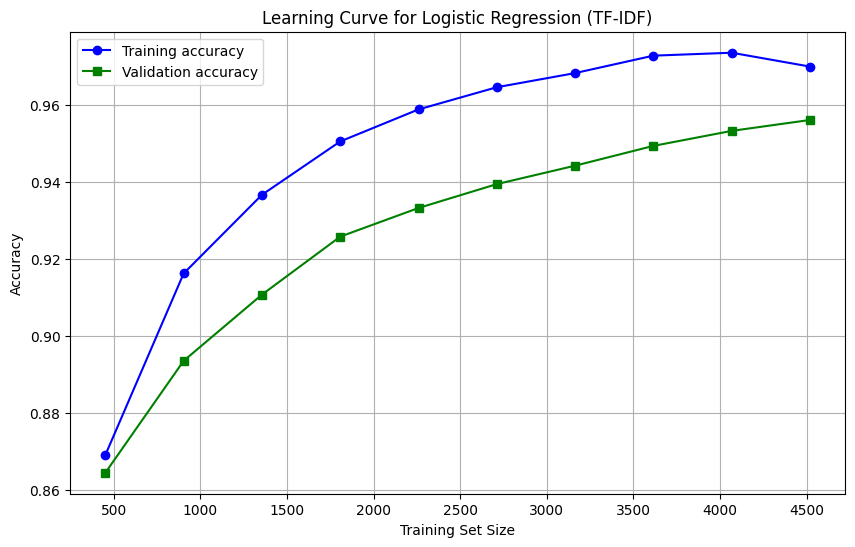

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Load Spam Dataset
spam_df = pd.read_csv("C:\\Users\\ASUS\\Downloads\\archive\\spam_sms.csv", sep=',', names=['label', 'message'])
spam_df['label'] = spam_df['label'].map({'ham': 0, 'spam': 1})  # ham -> 0, spam -> 1

# Load Business/Personal HAM Dataset
bp_df = pd.read_csv("D:\\NLP FILES\\ham_business_personal_combined.csv", names=["message", "label"], skiprows=1)

# Map bp_df labels: business -> 0, personal -> 1
bp_df['label'] = bp_df['label'].map({'business': 0, 'personal': 1})

# Combine datasets
combined_df = pd.concat([
    spam_df,
    bp_df
], ignore_index=True)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(combined_df['message'])
y = combined_df['label']

# Make sure no missing values (important!)
X = X
y = y.dropna().astype(int)  # Drop NaNs if any, and ensure integer type

# Define Model
model = LogisticRegression(max_iter=1000)

# Generate Learning Curve Data
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=model,
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Calculate mean
train_scores_mean = np.mean(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)

# Plot Learning Curve
plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_scores_mean, label='Training accuracy', color='blue', marker='o')
plt.plot(train_sizes, validation_scores_mean, label='Validation accuracy', color='green', marker='s')
plt.title('Learning Curve for Logistic Regression (TF-IDF)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [92]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Assuming your TF-IDF vectorizer and data preparation are already done
# X is TF-IDF transformed data, y is the label (spam/ham-business/ham-personal)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Classification Report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      1.00      0.98       962
           1       0.99      0.71      0.83       168

    accuracy                           0.96      1130
   macro avg       0.97      0.86      0.90      1130
weighted avg       0.96      0.96      0.95      1130



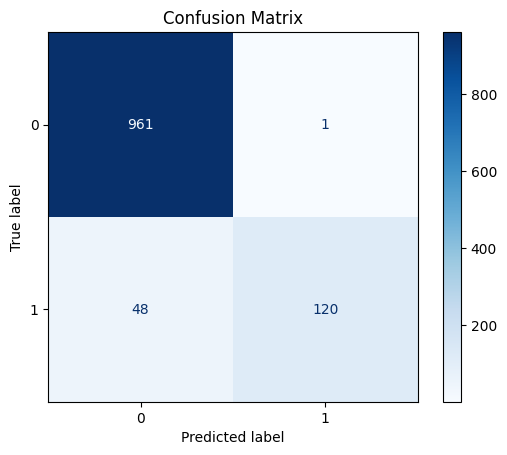

In [93]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [94]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Wrap Logistic Regression into OneVsRest
model = OneVsRestClassifier(LogisticRegression(max_iter=1000))

# Fit the model
model.fit(X_train, y_train)

# Now you can make predictions
y_pred_prob = model.predict_proba(X_test)

# Continue with ROC Curve logic


In [95]:
# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)  # Fit the model with the training data


LogisticRegression(max_iter=1000)

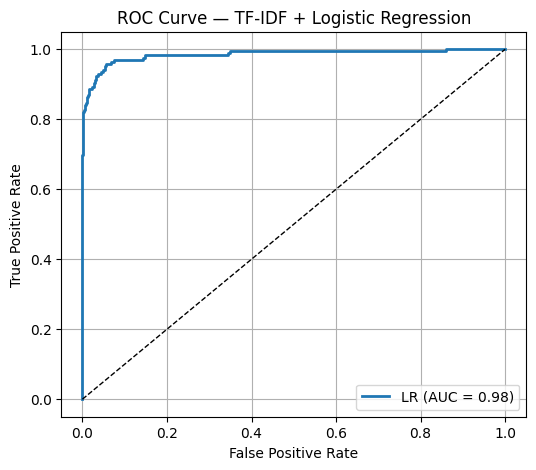

In [96]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

# Assuming X_train, X_test, y_train, and y_test are already defined and processed
# Define and train the Logistic Regression model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# get spam-class probability (class 1)
y_score = lr.predict_proba(X_test)[:, 1]

# compute ROC
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, lw=2, label=f'LR (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve — TF-IDF + Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


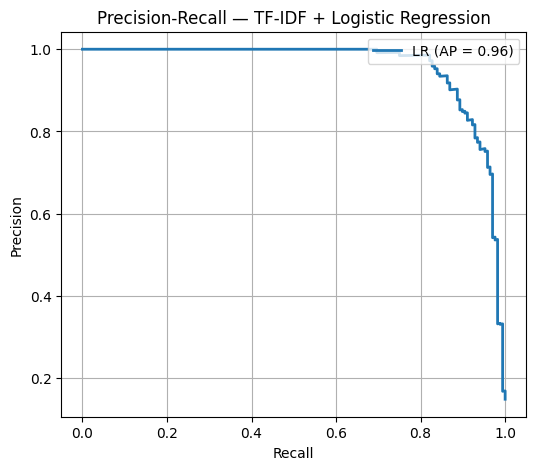

In [97]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_score)
avg_prec = average_precision_score(y_test, y_score)

plt.figure(figsize=(6,5))
plt.plot(recall, precision, lw=2, label=f'LR (AP = {avg_prec:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall — TF-IDF + Logistic Regression')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


In [98]:
# Assuming you already trained a logistic regression model on TF-IDF features
from sklearn.linear_model import LogisticRegression

# Recreate the model if needed
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Define y_test and y_score
y_test = y_test  # if already split earlier
y_score = lr.predict_proba(X_test)[:, 1]  # probability for class 'spam' (assumed label 1)


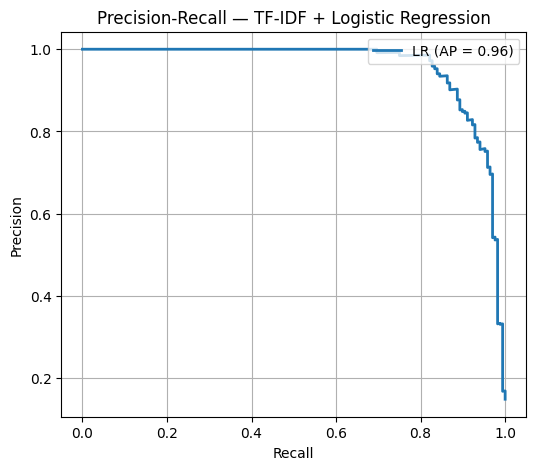

In [99]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, y_score)
avg_prec = average_precision_score(y_test, y_score)

plt.figure(figsize=(6,5))
plt.plot(recall, precision, lw=2, label=f'LR (AP = {avg_prec:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall — TF-IDF + Logistic Regression')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


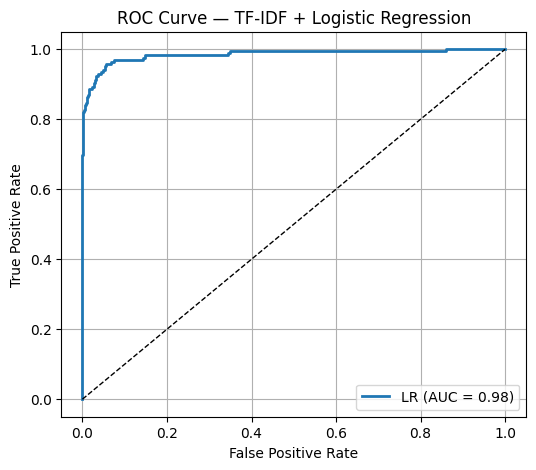

In [100]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# get spam‐class probability (class 1)
y_score = lr.predict_proba(X_test)[:, 1]

# compute ROC
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, lw=2, label=f'LR (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1],'k--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve — TF-IDF + Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


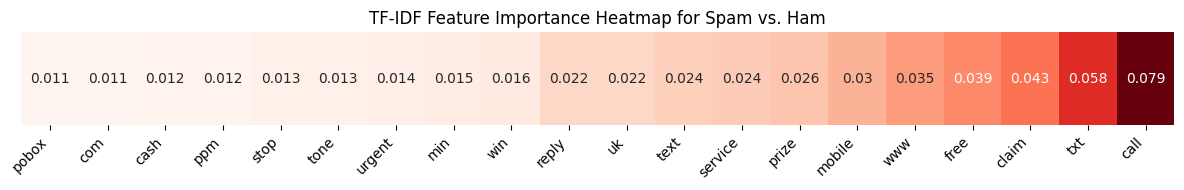

In [101]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume tfidf and rf (RandomForestClassifier) are already trained on spam/ham data
feature_names = tfidf.get_feature_names_out()
importances = rf.feature_importances_

# Select top 20 features
top_n = 20
indices = np.argsort(importances)[-top_n:]
top_features = feature_names[indices]
top_importances = importances[indices]

# Build DataFrame
df_imp = pd.DataFrame([top_importances], columns=top_features)

# Plot heatmap
plt.figure(figsize=(12, 2))
sns.heatmap(df_imp, annot=True, cmap='Reds', cbar=False)
plt.xticks(rotation=45, ha='right')
plt.yticks([], [])
plt.title('TF-IDF Feature Importance Heatmap for Spam vs. Ham')
plt.tight_layout()
plt.show()


In [102]:
import pandas as pd

# Load business/personal dataset
bp_df = pd.read_csv("D:\\NLP FILES\\ham_business_personal_combined.csv", names=["message", "label"], skiprows=1)

# Optional: check balance
print(bp_df['label'].value_counts())


label
business    39
personal    38
Name: count, dtype: int64


In [103]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Split dataset
X = bp_df['message']
y = bp_df['label']  # 0 for business, 1 for personal (or vice versa based on your data)

X_train_text, X_test_text, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenization
vocab_size = 10000
max_len = 100

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_text)

X_train_seq = tokenizer.texts_to_sequences(X_train_text)
X_test_seq = tokenizer.texts_to_sequences(X_test_text)

X_train_seq = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_seq = pad_sequences(X_test_seq, maxlen=max_len, padding='post')


In [104]:
from sklearn.preprocessing import LabelEncoder

# Encode labels
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)


In [105]:
# --- Required Libraries ---
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression

# --- Preprocessing ---
stop_words = set(stopwords.words('english'))
wnl = WordNetLemmatizer()

def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text).lower()
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(wnl.lemmatize(word) for word in words)

# --- Load and Clean Dataset ---
df = pd.read_csv("C:\\Users\\ASUS\\Downloads\\archive\\spam_sms.csv", names=["label", "message"], skiprows=1)
df['clean'] = df['message'].apply(preprocess_text)

# --- TF-IDF Vectorization ---
tfidf = TfidfVectorizer(max_features=500)
X_spam = tfidf.fit_transform(df['clean']).toarray()
y_spam = df['label'].map({'ham': 0, 'spam': 1})

# --- Models and Cross-Validation ---
models = {
    'MNB': MultinomialNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Voting': VotingClassifier(estimators=[
        ('mnb', MultinomialNB()),
        ('dt', DecisionTreeClassifier(random_state=42))
    ], voting='soft')
}

# --- Calculate and Print F1 Scores ---
f1_scores = {}
for name, model in models.items():
    scores = cross_val_score(model, X_spam, y_spam, cv=5, scoring='f1_macro')
    f1_scores[name] = scores
    print(f"{name} F1-Scores: {scores}")
    print(f"Average: {np.mean(scores):.3f} | Std Dev: {np.std(scores):.3f}\n")


MNB F1-Scores: [0.94166779 0.93569986 0.92835471 0.93796775 0.94663871]
Average: 0.938 | Std Dev: 0.006

Decision Tree F1-Scores: [0.9152677  0.91896989 0.92511741 0.92071457 0.91001082]
Average: 0.918 | Std Dev: 0.005

Random Forest F1-Scores: [0.95801062 0.96012314 0.95671201 0.94722034 0.95800505]
Average: 0.956 | Std Dev: 0.005

Logistic Regression F1-Scores: [0.9364998  0.93984825 0.93256914 0.93155146 0.93910039]
Average: 0.936 | Std Dev: 0.003

Voting F1-Scores: [0.9152677  0.91896989 0.92511741 0.92071457 0.91001082]
Average: 0.918 | Std Dev: 0.005



C:\Users\ASUS\AppData\Local\Temp\ipykernel_1376\504367831.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Model', y='F1-Score', data=df, palette='Set2')


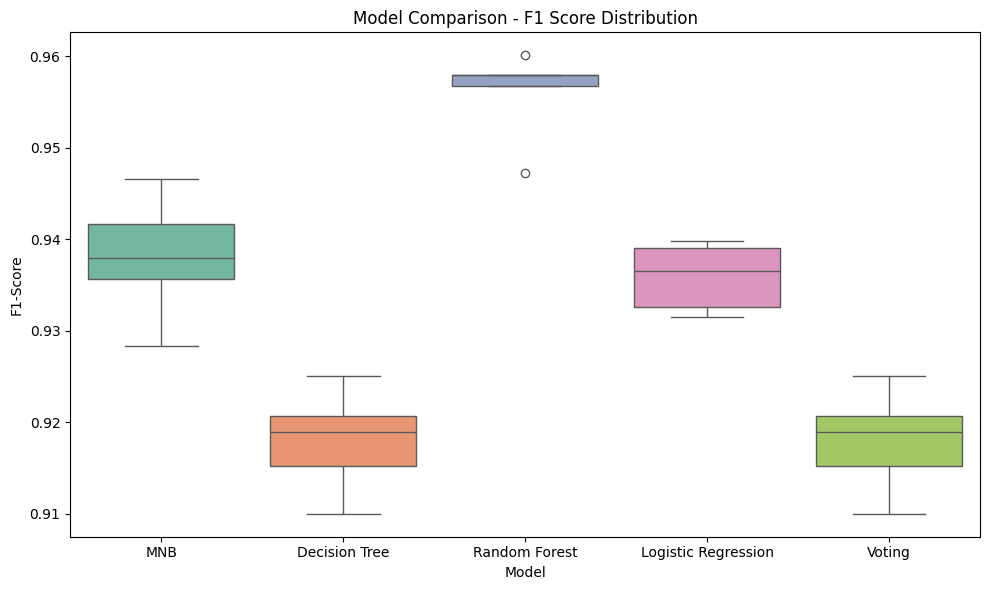

ANOVA F-statistic: 41.7929
p-value: 0.0000
✅ Result: Reject the null hypothesis. At least one model performs significantly differently.


In [106]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# ----------------------------
# F1-Scores from your project
# ----------------------------
f1_mnb = [0.94166779, 0.93569986, 0.92835471, 0.93796775, 0.94663871]
f1_dt = [0.9152677, 0.91896989, 0.92511741, 0.92071457, 0.91001082]
f1_rf = [0.95801062, 0.96012314, 0.95671201, 0.94722034, 0.95800505]
f1_lr = [0.9364998, 0.93984825, 0.93256914, 0.93155146, 0.93910039]
f1_voting = [0.9152677, 0.91896989, 0.92511741, 0.92071457, 0.91001082]

# -----------------------------------
# Create DataFrame for boxplot
# -----------------------------------
df = pd.DataFrame({
    'F1-Score': f1_mnb + f1_dt + f1_rf + f1_lr + f1_voting,
    'Model': ['MNB']*5 + ['Decision Tree']*5 + ['Random Forest']*5 + ['Logistic Regression']*5 + ['Voting']*5
})

# -----------------------------------
# Plot the F1-Score distribution
# -----------------------------------
plt.figure(figsize=(10, 6))
sns.boxplot(x='Model', y='F1-Score', data=df, palette='Set2')
plt.title("Model Comparison - F1 Score Distribution")
plt.tight_layout()
plt.savefig("anova_boxplot_f1_scores.png")  # Optional: saves the plot
plt.show()

# -----------------------------------
# Perform One-Way ANOVA
# -----------------------------------
f_stat, p_value = f_oneway(f1_mnb, f1_dt, f1_rf, f1_lr, f1_voting)

# Output results
print(f"ANOVA F-statistic: {f_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("✅ Result: Reject the null hypothesis. At least one model performs significantly differently.")
else:
    print("❌ Result: Fail to reject the null hypothesis. No significant performance difference among models.")


In [107]:
import pandas as pd

# Load the second dataset
ham_df = pd.read_csv("D:\\NLP FILES\\ham_business_personal_combined.csv")

# Display the first 5 rows
print(ham_df.head())
print(ham_df.tail())


                                             message     label
0  Your invoice for the recent transaction has be...  business
1  Reminder: The team conference call is at 10 AM...  business
2  Project update: The client has approved the pr...  business
3  Meeting scheduled for 3 PM with the HR team. P...  business
4  Your bank account statement for this month is ...  business
                                              message     label
72          Check out this hilarious meme I just saw!  personal
73  That concert last night was amazing. You shoul...  personal
74                       What are your weekend plans?  personal
75          I’m bored. Want to play something online?  personal
76           We need to plan our next road trip soon!  personal


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


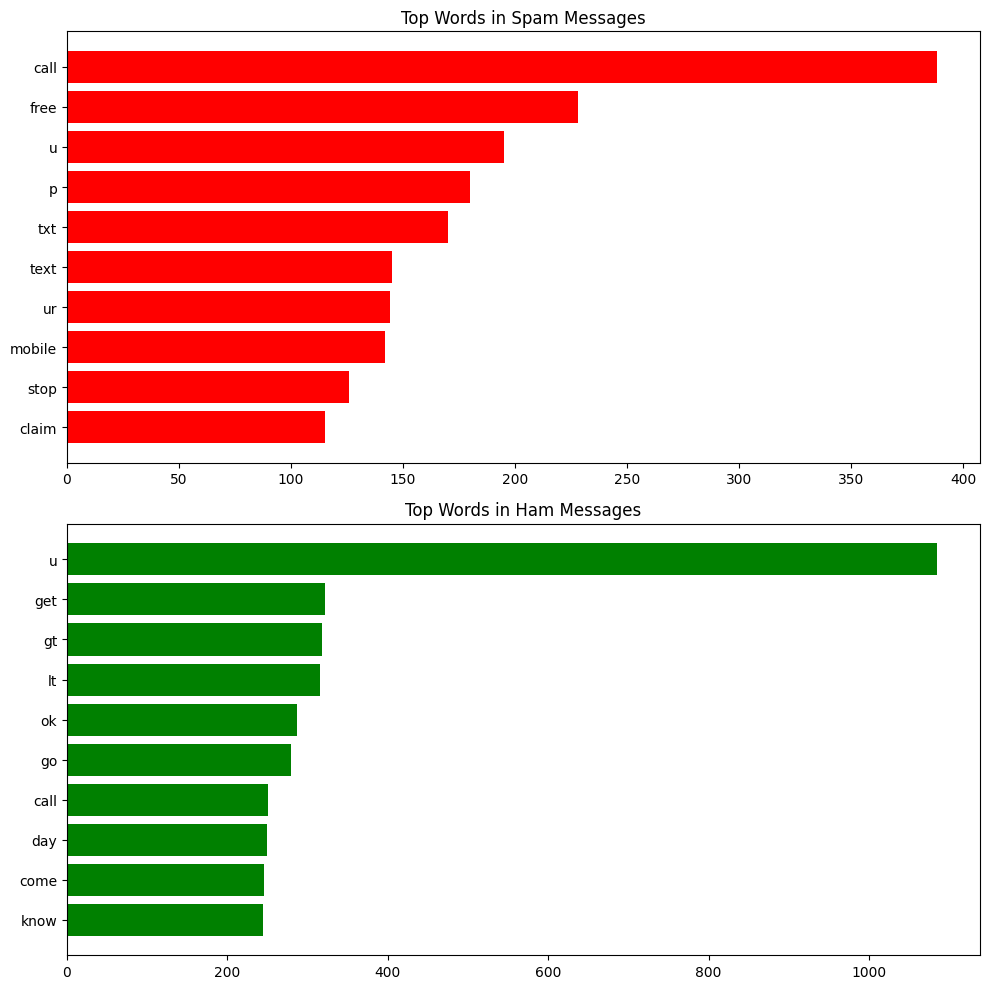

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

# Loading the dataset
df = pd.read_csv("C:\\Users\\ASUS\\Downloads\\archive\\spam_sms.csv", sep=',', names=['label', 'message'])

# Preprocess function
def preprocess_text(text):
    # Remove special characters
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Lowercase
    text = text.lower()
    # Tokenize
    words = text.split()
    # Remove stopwords
    words = [w for w in words if w not in set(stopwords.words('english'))]
    # Lemmatize
    wnl = WordNetLemmatizer()
    words = [wnl.lemmatize(w) for w in words]
    return words

# Preprocess spam and ham separately
spam_words = []
ham_words = []

for idx, row in df.iterrows():
    words = preprocess_text(row['message'])
    if row['label'] == 'spam':
        spam_words.extend(words)
    else:
        ham_words.extend(words)

# Get top 10 words
spam_top_words = Counter(spam_words).most_common(10)
ham_top_words = Counter(ham_words).most_common(10)

# Plot
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Spam plot
words, counts = zip(*spam_top_words)
axs[0].barh(words, counts, color='red')
axs[0].set_title('Top Words in Spam Messages')
axs[0].invert_yaxis()

# Ham plot
words, counts = zip(*ham_top_words)
axs[1].barh(words, counts, color='green')
axs[1].set_title('Top Words in Ham Messages')
axs[1].invert_yaxis()

plt.tight_layout()
plt.show()


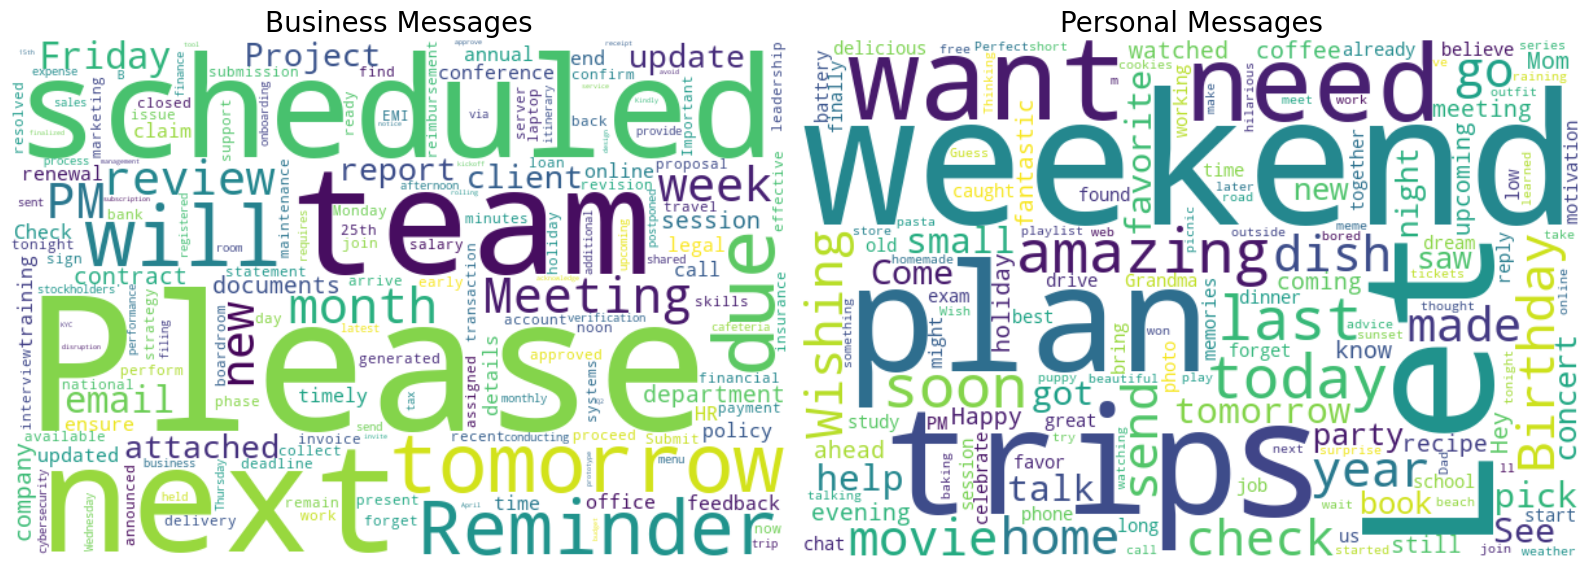

In [113]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load your ham_business_personal_combined dataset
df2 = pd.read_csv("D:\\NLP FILES\\ham_business_personal_combined.csv", names=["message", "label"], skiprows=1) # update path if needed

# Separate business and personal messages
business_text = ' '.join(df2[df2['label'] == 'business']['message'].values)
personal_text = ' '.join(df2[df2['label'] == 'personal']['message'].values)

# Create WordCloud objects
business_wc = WordCloud(width=600, height=400, background_color='white').generate(business_text)
personal_wc = WordCloud(width=600, height=400, background_color='white').generate(personal_text)

# Plot the Word Clouds
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Business word cloud
axs[0].imshow(business_wc, interpolation='bilinear')
axs[0].set_title('Business Messages', fontsize=20)
axs[0].axis('off')

# Personal word cloud
axs[1].imshow(personal_wc, interpolation='bilinear')
axs[1].set_title('Personal Messages', fontsize=20)
axs[1].axis('off')

plt.tight_layout()
plt.show()


                                             message     label
0  Your invoice for the recent transaction has be...  business
1  Reminder: The team conference call is at 10 AM...  business
2  Project update: The client has approved the pr...  business
3  Meeting scheduled for 3 PM with the HR team. P...  business
4  Your bank account statement for this month is ...  business
['business' 'personal']
Business text length: 2705
Personal text length: 2014


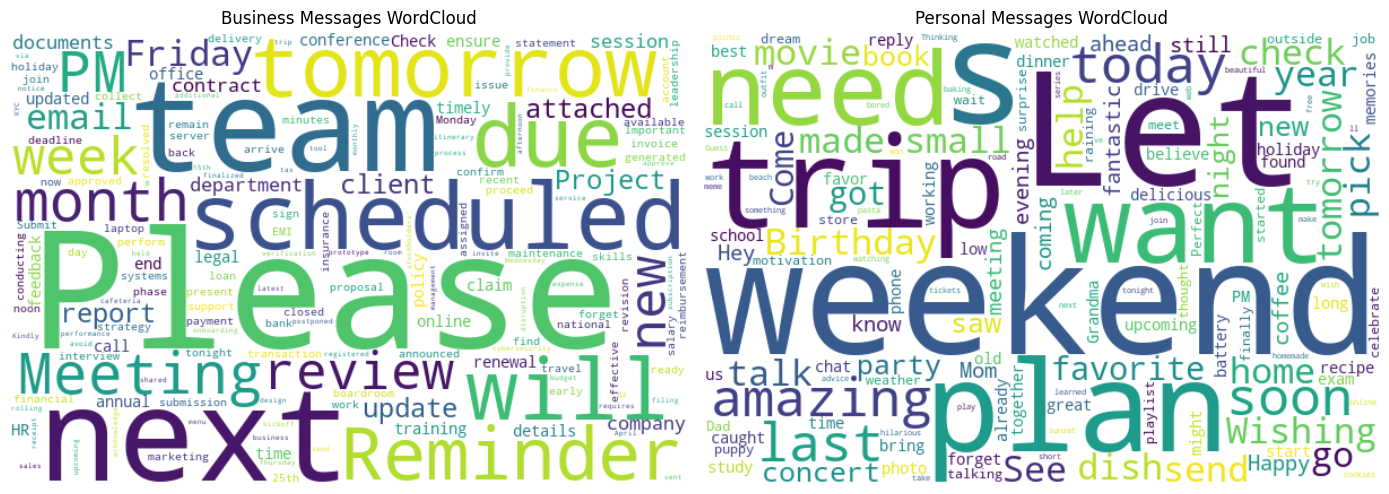

In [114]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load your second dataset properly
df2 = pd.read_csv("D:\\NLP FILES\\ham_business_personal_combined.csv", names=["message", "label"], skiprows=1) # update path if needed

# Check if the data loaded correctly
print(df2.head())

# Check if label has 'business' and 'personal'
print(df2['label'].unique())

# Make sure no empty rows
df2 = df2.dropna()

# Separate text
business_text = ' '.join(df2[df2['label'] == 'business']['message'].astype(str))
personal_text = ' '.join(df2[df2['label'] == 'personal']['message'].astype(str))

# Check if text is actually not empty
print(f"Business text length: {len(business_text)}")
print(f"Personal text length: {len(personal_text)}")

# Now create WordClouds
business_wc = WordCloud(width=600, height=400, background_color='white').generate(business_text)
personal_wc = WordCloud(width=600, height=400, background_color='white').generate(personal_text)

# Plot
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.imshow(business_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Business Messages WordCloud')

plt.subplot(1,2,2)
plt.imshow(personal_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Personal Messages WordCloud')

plt.tight_layout()
plt.show()
